<a href="https://colab.research.google.com/github/Caculuz-cinks/black_faces_age_estimation/blob/main/Appa_real_Age_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
folder_path = '/content/drive/My Drive/Appa-real'

In [ ]:
!pip install ktrain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 54.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 43.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.2/19.2 MB 62.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.4/199.4 kB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 kB 26.1 MB/s eta 0:00:00
  Created wheel for ktrain: filename=ktrain-0.41.4-py3-none-any.whl size=25316932 sha256=ecf7cadf7c89

In [ ]:
%matplotlib inline
import os
import ktrain
from ktrain import vision as vis
import tensorflow as tf
from tensorflow import keras


In [ ]:
#import re
# pattern = r'([^/]+).JPG$'
#pattern = r'[^/]+(\d{2}).JPG$'
#pattern = r'\d+_[a-zA-Z]+_([^/]+)_[a-z].jpg$'
# pattern = r'([A-Za-z0-9]+)\.JPG$'

#p = re.compile(pattern)

#r = p.search('/content/drive/My Drive/AgeDB/9825_JudyDavis_31_f.jpg')

#print(r.group(1))

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import os

# Load the annotations (assuming a CSV file with columns: 'filename' and 'label')
annotations = pd.read_csv('/content/drive/My Drive/Appa-real/labels.csv')

# Extract filenames and labels
filenames = annotations['file_name'].values
real_ages = annotations['real_age'].values

# Assuming your images are stored in a directory:
image_paths = [os.path.join('/content/drive/My Drive/Appa-real/final_files/final_files', fname) for fname in filenames]


In [ ]:
# Split the data
X_train, X_val, y_train, y_val = train_test_split(image_paths, real_ages, test_size=0.2, random_state=42)

print(f"Number of training samples: {len(X_train)}")
print(f"Number of validation samples: {len(X_val)}")


Number of training samples: 6072
Number of validation samples: 1519


In [ ]:
import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an ImageDataGenerator for training and validation
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

# Training generator
train_data = train_datagen.flow_from_dataframe(
    dataframe=pd.DataFrame({'file_name': X_train, 'real_age': y_train}),
    x_col='file_name',
    y_col='real_age',
    target_size=(224, 224),
    batch_size=32,
    class_mode='raw'  # or 'categorical' or 'binary', depending on your labels
)

# Validation generator
val_data = val_datagen.flow_from_dataframe(
    dataframe=pd.DataFrame({'file_name': X_val, 'real_age': y_val}),
    x_col='file_name',
    y_col='real_age',
    target_size=(224, 224),
    batch_size=32,
    class_mode='raw'
)

Found 6072 validated image filenames.
Found 1519 validated image filenames.


In [ ]:
#DATADIR = '/content/drive/My Drive/AgeDB'

In [ ]:
#(train_data, test_data, preproc) = vis.images_from_fname(DATADIR, pattern = pattern, is_regression= True,
                     # random_state = 42)

In [ ]:
vis.print_image_regression_models()

pretrained_resnet50: 50-layer Residual Network (pretrained on ImageNet)
resnet50: 50-layer Resididual Network (randomly initialized) [https://arxiv.org/abs/1512.03385]
pretrained_mobilenet: MobileNet Neural Network (pretrained on ImageNet)
mobilenet: MobileNet Neural Network (randomly initialized) [https://arxiv.org/abs/1704.04861]
pretrained_mobilenetv3: MobileNetV3-Small Neural Network (pretrained on ImageNet)
mobilenetv3: MobileNetV3-Small Neural Network (randomly initialized) [https://arxiv.org/abs/1905.02244]
pretrained_inception: Inception Version 3  (pretrained on ImageNet)
inception: Inception Version 3 (randomly initialized) [http://arxiv.org/abs/1512.00567]
pretrained_efficientnetb1: EfficientNet-B1 Neural Network (pretrained on ImageNet)
efficientnetb1: EfficientNet-B1 Neural Network (pretrained on ImageNet) [https://arxiv.org/abs/1905.11946]
pretrained_efficientnetb7: EfficientNet-B7 Neural Network (pretrained on ImageNet)
efficientnetb7: EfficientNet-B7 Neural Network (pre

In [ ]:
model = vis.image_regression_model('pretrained_resnet50', train_data = train_data, val_data = val_data)

The normalization scheme has been changed for use with a pretrained_resnet50 model. If you decide to use a different model, please reload your dataset with a ktrain.vision.data.images_from* function.

Is Multi-Label? False
Is Regression? True
94765736/94765736 [==============================] - 0s 0us/step
pretrained_resnet50 model created.


In [ ]:
learner = ktrain.get_learner(model = model, train_data = train_data, val_data = val_data, batch_size = 64)

In [ ]:
learner.fit_onecycle(1e-4, 2)



begin training using onecycle policy with max lr of 0.0001...
Epoch 1/2
95/95 [==============================] - 366s 4s/step - loss: 26.6229 - mae: 3.9325 - val_loss: 84.6525 - val_mae: 7.1143
Epoch 2/2
95/95 [==============================] - 365s 4s/step - loss: 21.3498 - mae: 3.5577 - val_loss: 80.7198 - val_mae: 6.8157


In [ ]:
learner.freeze(15)


learner.fit_onecycle(1e-4, 2)



begin training using onecycle policy with max lr of 0.0001...
Epoch 1/2
95/95 [==============================] - 369s 4s/step - loss: 18.1625 - mae: 3.2358 - val_loss: 98.2626 - val_mae: 7.4717
Epoch 2/2
95/95 [==============================] - 358s 4s/step - loss: 18.7507 - mae: 3.3009 - val_loss: 79.9016 - val_mae: 6.7916


In [ ]:
#predictor = ktrain.get_predictor(learner.model, preproc)

In [ ]:
#val_data.filenames[10:20]

In [ ]:
learner.model.save('my_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from tensorflow.keras.models import load_model

model = load_model('my_model.h5')


In [ ]:
from google.colab import files

# Upload an image
uploaded = files.upload()

# Get the filename of the uploaded image
filenames = list(uploaded.keys())
print(f"Uploaded file: {filenames}")

Saving 16489_IsaiahAdeleke_22_m.jpg to 16489_IsaiahAdeleke_22_m.jpg
Saving 16494_EmmanuelAgboola_12_m.jpg to 16494_EmmanuelAgboola_12_m.jpg
Saving 16490_DaddyAdekola_80_m.jpg to 16490_DaddyAdekola_80_m.jpg
Saving 16491_MrsOyalola_53_f.jpg to 16491_MrsOyalola_53_f.jpg
Saving 16492_IsrealApata_02_m.jpg to 16492_IsrealApata_02_m.jpg
Saving 16493_MrsApata_28_f.jpg to 16493_MrsApata_28_f.jpg
Uploaded file: ['16489_IsaiahAdeleke_22_m.jpg', '16494_EmmanuelAgboola_12_m.jpg', '16490_DaddyAdekola_80_m.jpg', '16491_MrsOyalola_53_f.jpg', '16492_IsrealApata_02_m.jpg', '16493_MrsApata_28_f.jpg']


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

img = image.load_img('/content/16489_IsaiahAdeleke_22_m.jpg',
target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array /= 255.
batch_size=32,  # Rescale like during training


In [ ]:
prediction = model.predict(img_array)


 # print("Prredicted Age: %s | Actual Age: %s" % (pred, actual))

1/1 [==============================] - 1s 1s/step


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

def show_prediction(fname, real_age):
    # Load and preprocess the image
    img = image.load_img(fname, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array /= 255.  # Rescale like during training

    # Make the prediction (assuming model is already loaded and accessible)
    prediction = model.predict(img_array)
    pred = round(prediction[0][0])

    # Display the image
    plt.imshow(img)
    plt.axis('off')  # Hide axes
    plt.show()

    # Print the predicted and actual age
    print("Predicted Age: %s | Actual Age: %s" % (pred, real_age))


1/1 [==============================] - 0s 81ms/step


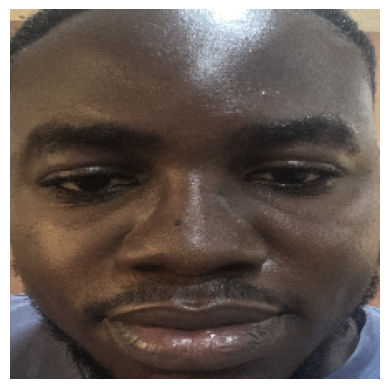

Predicted Age: 28 | Actual Age: 22


In [ ]:
show_prediction('/content/16489_IsaiahAdeleke_22_m.jpg', 22)

1/1 [==============================] - 0s 81ms/step


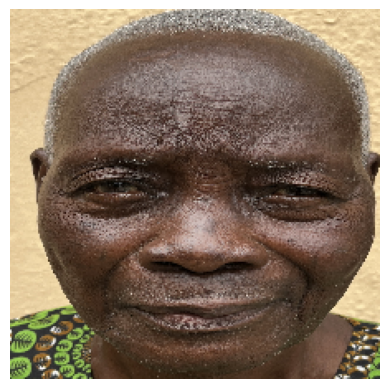

Predicted Age: 28 | Actual Age: 80


In [ ]:
show_prediction('/content/16490_DaddyAdekola_80_m.jpg', 80)

1/1 [==============================] - 0s 82ms/step


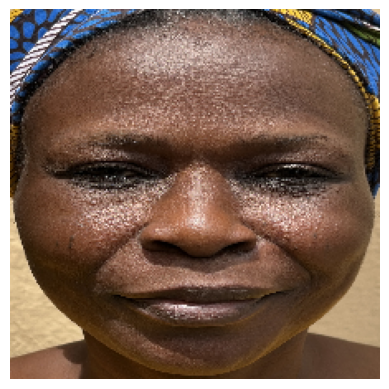

Predicted Age: 28 | Actual Age: 53


In [ ]:
show_prediction('/content/16491_MrsOyalola_53_f.jpg', 53)

1/1 [==============================] - 0s 82ms/step


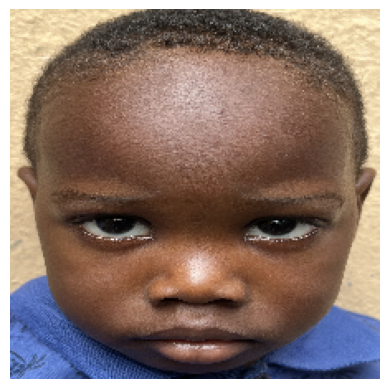

Predicted Age: 28 | Actual Age: 2


In [ ]:
show_prediction('/content/16492_IsrealApata_02_m.jpg', 2)

1/1 [==============================] - 0s 79ms/step


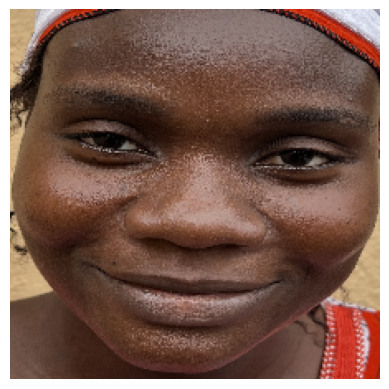

Predicted Age: 28 | Actual Age: 28


In [ ]:
show_prediction('/content/16493_MrsApata_28_f.jpg', 28)

1/1 [==============================] - 0s 78ms/step


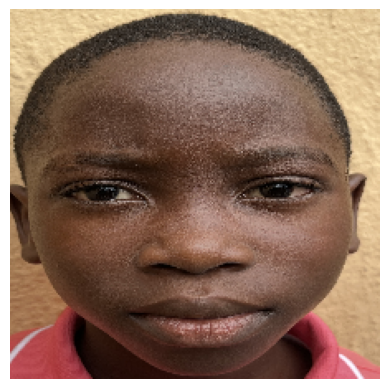

Predicted Age: 28 | Actual Age: 12


In [ ]:
show_prediction('/content/16494_EmmanuelAgboola_12_m.jpg', 12)